In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
from numpy import pi

import bateman as bt
import thermalization as th
import heat as ht
import lightcurve as lc



c = 2.99792458e10
day = 86400.
Msun = 1.9885e33



%matplotlib inline
%load_ext autoreload
%autoreload 2

<font size="4.5"> 
- Read effective opacities to gamma-rays for each elements<br>
</font>

In [2]:
#fkappa = pd.read_csv('effective_kappa_A141_238.dat',delim_whitespace=True,header=None)
fkappa = pd.read_csv('input_files/effective_kappa_A85_238.dat',delim_whitespace=True,header=None)
#fkappa = pd.read_csv('effective_kappa_141_238.dat',delim_whitespace=True,header=None)

kappa_effs = 0.02*np.ones((240,100))
for i in range(0,len(fkappa)):
    A = fkappa[0][i]
    Z = fkappa[1][i]
    kappa = np.sqrt(fkappa[3][i]*fkappa[4][i])
    kappa_effs[A][Z] = kappa

/var/folders/qf/j495f6rd5_52r4vxvnhky6jr0000gn/T/ipykernel_82465/2689731801.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fkappa = pd.read_csv('input_files/effective_kappa_A85_238.dat',delim_whitespace=True,header=None)


<font size="4.5"> 
- Read abundances of each beta-decay chain <br>
</font>
The file format is
(Z A Y), where Z is an atomic number, A is an atomic mass number, and Y is a number fraction. The following example file corresponds to the solar r-process pattern with A>=70. (beta-decay chains between A=50 and 209 can be included.)

In [3]:
ffraction = pd.read_csv('input_files/solar_r_abundance_pattern.dat',delim_whitespace=True,header=None)

/var/folders/qf/j495f6rd5_52r4vxvnhky6jr0000gn/T/ipykernel_82465/216970157.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ffraction = pd.read_csv('input_files/solar_r_abundance_pattern.dat',delim_whitespace=True,header=None)


<font size="4.5">
- Define the range of atomic numbers of beta-decay chains and the ejecta model (density profile). <br>
</font>

We use a radial density profile of merger ejecta with a total mass of 
$M_{\rm ej}$ and a minimum velocity of $v_0$:
$$
  \rho(t,v) = 
        \rho_0(t)\left(\frac{v_{\rm ej}}{v_0}\right)^{-n}~{\rm for}~(v_0\leq v_{\rm ej}\leq v_{\rm max})
$$
where $\rho_0(t)$ is defined such that 
$$ 
M_{\rm ej} = 4\pi \int_{v_0}^{v_{\rm max}}dvv^2 \rho(t,v).
$$


In [4]:
##########Start input parameters
Amin = 85
Amax = 209

##########ejecta parameters for thermalization
Mej = 0.1608*Msun
vej = 0.1*c
n = 4.5
alpha_max = 4.0#v_max = alpha_max * vej
alpha_min = 1.#v_min = alpha_min * vej

<font size="4.5"> 
- Calculate the beta decay radioactive power and heating rate <br>
</font>

In [5]:
beta = ht.calc_heating_rate(Mej,vej, Amin,Amax,ffraction,kappa_effs,alpha_max,alpha_min,n)

/Users/divyansh/Documents/Research_Projects/Black-Hole-NS-Mass_GAP/Codes/Lightcurve_Code/heat.py:75: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fchain = pd.read_csv(filename,delim_whitespace=True,header=None)
/Users/divyansh/Documents/Research_Projects/Black-Hole-NS-Mass_GAP/Codes/Lightcurve_Code/heat.py:75: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fchain = pd.read_csv(filename,delim_whitespace=True,header=None)
/Users/divyansh/Documents/Research_Projects/Black-Hole-NS-Mass_GAP/Codes/Lightcurve_Code/heat.py:75: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fchain = pd.read_csv(filename,delim_whitespace=True,header=None)
/Users/divyansh/Documents/Research_Projects/Black-Hole-NS-Mass_GAP/Cod

<font size="4.5"> 
- Write the data to a file<br>
</font>
t:[day], heating rates: [erg/s/g]

In [6]:
data = {'t':beta['t'],'total':beta['total'],'gamma':beta['gamma'], 'electron':beta['electron'], 'gamma_th':beta['gamma_th'],'electron_th':beta['electron_th']}
df = pd.DataFrame(data=data)
df.to_csv('output_files/heat85_209_M005_v04_v1_n45.dat',sep=" ",index=False,header=None,columns=['t', 'total', 'gamma', 'electron','gamma_th','electron_th'])

<font size="4.5"> 
- Plot the data <br>
</font>

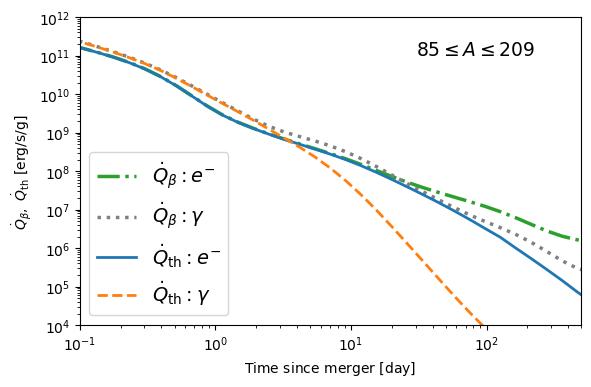

In [7]:
from matplotlib import rc
rc('text', usetex=False)
fig, ax = plt.subplots(figsize=(6.472135955, 4))
plt.xlim(0.1,500.)
plt.ylim(1.0e4,1.0e12)
plt.ylabel(r'$\dot{Q}_{\beta},~\dot{Q}_{\rm th}~[{\rm erg/s/g}]$')
plt.xlabel(r'${\rm Time~since~merger~[day]}$')
plt.loglog(beta['t'],beta['electron'],label=r'$\dot{Q}_{\beta}:e^{-}$',linestyle='-.',linewidth=2.5,color='C2')
plt.loglog(beta['t'],beta['gamma'],label=r'$\dot{Q}_{\beta}:\gamma$',linestyle=':',linewidth=2.5,color='grey')
plt.loglog(beta['t'],beta['electron_th'],label=r'$\dot{Q}_{\rm th}:e^{-}$',linestyle='-',linewidth=2.,color='C0')
plt.loglog(beta['t'],beta['gamma_th'],label=r'$\dot{Q}_{\rm th}:\gamma$',linestyle='--',linewidth=2.,color='C1')

plt.text(30,1.0e11,'$85\leq A\leq 209$',fontsize=13.5)

plt.legend(loc='lower left',fontsize=14)
plt.savefig("output_files/heat_A85.pdf",dpi=600,bbox_inches='tight')
plt.show()

<font size="4.5"> 
- Bolometric light curve and temperature at the photosphere<br>
</font>
The opacities of the inner and outer parts of the ejecta are set to be
\begin{eqnarray}
\kappa=\kappa_{\rm high}~{\rm for}~(v\leq v_{\kappa})~~~~{\rm and}~~~~\kappa=\kappa_{\rm low}~{\rm for}~(v>v_{\kappa})
\end{eqnarray}

In [8]:
#input parameters for the calculation of a light curve
kappa_low = 0.5  #opacity [cm^2/g] for v > v_kappa
kappa_high = 3.0 #opacity [cm^2/g] for v < v_kappa
be_kappa = 0.2

heat_time = np.array(beta['t'])
heat_rate = np.array(beta['electron_th'])+np.array(beta['gamma_th'])

<font size="4.5"> 
- Compute the bolometric light curve and temperature at the photosphere<br>
</font>

In [9]:
LC = lc.calc_lightcurve(Mej,vej,alpha_max,alpha_min,n,kappa_low,kappa_high,be_kappa,heat_time, heat_rate)

<font size="4.5"> 
- Write the data to a file<br>
</font>
t: [day], light curve: [erg/s], temperature: [K]

In [10]:
data = {'t':LC['t'],'LC':LC['LC'],'Temp':LC['T'],'Radius':LC['R']}
df = pd.DataFrame(data=data)
df.to_csv('output_files/lightcurve.dat',sep=" ",index=False,header=None,columns=['t', 'LC', 'Temp', 'Radius'])

<font size="4.5"> 
- Plot the bolometric light curve <br>
</font>

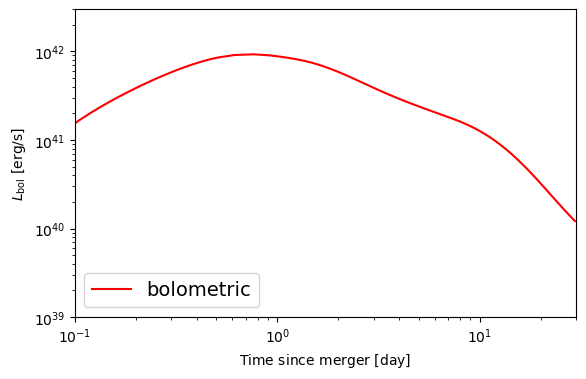

In [11]:
from matplotlib import rc
rc('text', usetex=False)
fig, ax = plt.subplots(figsize=(6.472135955, 4))
plt.xlim(0.1,30.)
plt.ylim(1.0e39,3.0e42)
plt.ylabel(r"$L_{\rm bol}~[{\rm erg/s}]$")
plt.xlabel(r"${\rm Time~since~merger~[day]}$")
plt.loglog(LC['t'],LC['LC'],label='bolometric',linestyle='-',linewidth=1.5,color='r')



plt.legend(loc='lower left',fontsize=14)
plt.savefig("output_files/LC_A85.pdf",dpi=600,bbox_inches='tight')
plt.show()

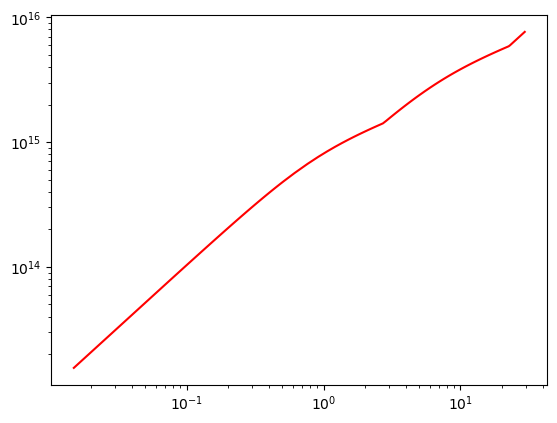

In [52]:
plt.loglog(LC['t'],LC['R'],label='bolometric',linestyle='-',linewidth=1.5,color='r')

In [5]:
def lightcurve(M,v,alpha_max,alpha_min,n,kappa_low,kappa_high,be_kappa,EOS):
    import synphot
    from astropy import units as u
    c = 2.99792458e10
    Msun = 1.9885e33
    vej = v*c 
    Mej = M*Msun
    beta = ht.calc_heating_rate(Mej,vej, Amin,Amax,ffraction,kappa_effs,alpha_max,alpha_min,n)
    heat_time = np.array(beta['t'])
    heat_rate = np.array(beta['electron_th'])+np.array(beta['gamma_th'])

    LC = lc.calc_lightcurve(Mej,vej,alpha_max,alpha_min,n,kappa_low,kappa_high,be_kappa,heat_time, heat_rate)

    bandpass_labels = 'ubvri'
    bandpasses = [
    synphot.SpectralElement.from_filter(f'johnson_{label}')
    for label in bandpass_labels]
    seds = [
    synphot.SourceSpectrum(synphot.BlackBody1D, temperature=TT)
    * np.pi * (rr / 3.08567758128E+26)**2
    for TT, rr in zip(LC['T'], LC['R'])]
    abmags = [
    [synphot.Observation(sed, bandpass).effstim(u.ABmag).value for sed in seds]
    for bandpass in bandpasses]

    data = {'t':LC['t'],'LC':LC['LC'],'Temp':LC['T'],'Radius':LC['R'],'abmags':abmags}
    # df = pd.DataFrame(data=data)
    # df.to_csv('output_files/lightcurve.dat',sep=" ",index=False,header=None,columns=['t', 'LC', 'Temp', 'Radius'])

    # from matplotlib import rc
    # rc('text', usetex=False)
    # fig, ax = plt.subplots(figsize=(6.472135955, 4))
    # plt.xlim(0.1,30.)
    # plt.ylim(1.0e39,3.0e42)
    # plt.ylabel(r"$L_{\rm bol}~[{\rm erg/s}]$")
    # plt.xlabel(r"${\rm Time~since~merger~[day]}$")
    # plt.loglog(LC['t'],LC['LC'],label='bolometric',linestyle='-',linewidth=1.5,color='r')
    # plt.title(r'EOS = {EOS} M={M}M$_\odot$ v={v}c'.format(EOS=EOS,M=M,v=v))


    # plt.legend(loc='lower left',fontsize=14)
    # # plt.savefig("output_files/LC_A85.pdf",dpi=600,bbox_inches='tight')
    # plt.show()

    return data

In [13]:
L1 =  lightcurve(0.1608,0.1,4.0,1.0,4.5,0.5,3.0,0.2,"DD2")   ## 0.1581 + 0.0027 
L2 =  lightcurve(0.1876,0.1,4.0,1.0,4.5,0.5,3.0,0.2,"DD2")   ## 0.1832 + 0.0041
L3 =  lightcurve(0.1006,0.1,4.0,1.0,4.5,0.5,3.0,0.2,"LS220")   ## 0.0971 + 0.0035
L4 =  lightcurve(0.003,0.1,4.0,1.0,4.5,0.5,3.0,0.2,"LS220")   ## 0.0003 + 0.0027
L5 =  lightcurve(0.0361,0.1,4.0,1.0,4.5,0.5,3.0,0.2,"SLy")  ## 0.0323 + 0.0038
L6 =  lightcurve(0.0623,0.1,4.0,1.0,4.5,0.5,3.0,0.2,"SLy")  ## 0.0563 + 0.0060

/Users/divyansh/Documents/Research_Projects/Black-Hole-NS-Mass_GAP/Codes/Lightcurve_Code/heat.py:75: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fchain = pd.read_csv(filename,delim_whitespace=True,header=None)
/Users/divyansh/Documents/Research_Projects/Black-Hole-NS-Mass_GAP/Codes/Lightcurve_Code/heat.py:75: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fchain = pd.read_csv(filename,delim_whitespace=True,header=None)
/Users/divyansh/Documents/Research_Projects/Black-Hole-NS-Mass_GAP/Codes/Lightcurve_Code/heat.py:75: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fchain = pd.read_csv(filename,delim_whitespace=True,header=None)
/Users/divyansh/Documents/Research_Projects/Black-Hole-NS-Mass_GAP/Cod

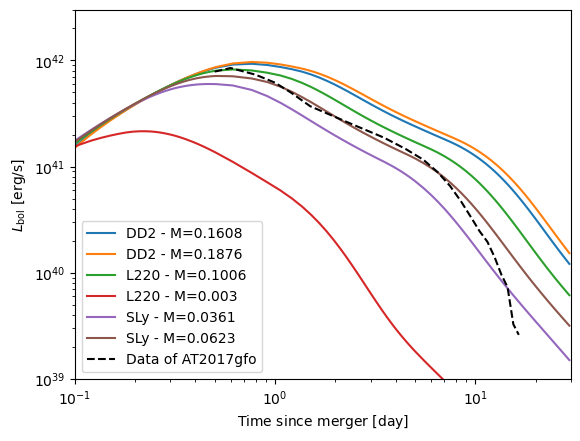

In [14]:
from matplotlib import rc
rc('text', usetex=False)

t = [0.5,0.6,0.8,1.0,1.2,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5]
L_int = [7.82e+41,8.45e+41,7.31e+41,6.15e+41,4.97e+41,3.69e+41,2.44e+41,1.87e+41,1.46e+41,1.16e+41,8.84e+40,6.53e+40,4.69e+40,3.36e+40,2.47e+40,1.96e+40,1.40e+40,9.64e+39,7.33e+39,3.28e+39,2.61e+39]
L_bb = [1.2e+42,1.3e+42,7.0e+41,5.5e+41,4.8e+41,3.6e+41,2.3e+41,1.7e+41,1.4e+41,1.0e+41,9.1e+40,7.0e+40,4.5e+40,2.9e+40,2.0e+40,3.0e+40,3.0e+40,2.1e+40,1.7e+40,7.7e+38,7.7e+38]

fig, ax = plt.subplots()
plt.xlim(0.1,30.)
plt.ylim(1.0e39,3.0e42)
plt.ylabel(r"$L_{\rm bol}~[{\rm erg/s}]$")
plt.xlabel(r"${\rm Time~since~merger~[day]}$")
plt.loglog(L1['t'],L1['LC'],label='DD2 - M=0.1608',linestyle='-',linewidth=1.5)
plt.loglog(L2['t'],L2['LC'],label='DD2 - M=0.1876',linestyle='-',linewidth=1.5)
plt.loglog(L3['t'],L3['LC'],label='L220 - M=0.1006',linestyle='-',linewidth=1.5)
plt.loglog(L4['t'],L4['LC'],label='L220 - M=0.003',linestyle='-',linewidth=1.5)
plt.loglog(L5['t'],L5['LC'],label='SLy - M=0.0361',linestyle='-',linewidth=1.5)
plt.loglog(L6['t'],L6['LC'],label='SLy - M=0.0623',linestyle='-',linewidth=1.5)
plt.loglog(t,L_int,label='Data of AT2017gfo',linestyle='--',linewidth=1.5,color='black')
# plt.loglog(t,L_bb,label='Data of AT2017gfo-Blackbody',linestyle='--',linewidth=1.5,color='purple')
# plt.title(r'EOS = {EOS} M={M}M$_\odot$ v={v}c'.format(EOS=EOS,M=M,v=v))
plt.legend(loc='lower left',fontsize=10)
# plt.savefig("output_files/LC_A85.pdf",dpi=600,bbox_inches='tight')
plt.show()

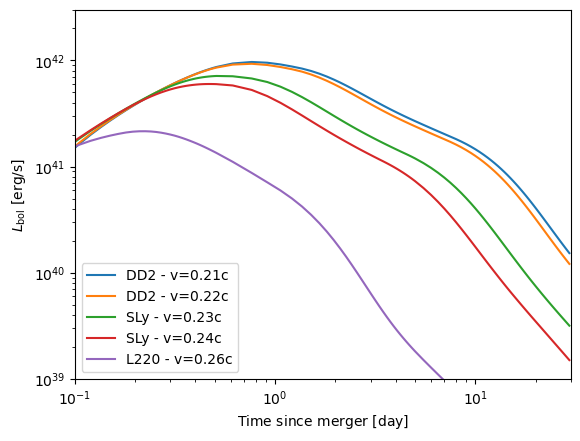

In [16]:
from matplotlib import rc
rc('text', usetex=False)
fig, ax = plt.subplots()
plt.xlim(0.1,30.)
plt.ylim(1.0e39,3.0e42)
plt.ylabel(r"$L_{\rm bol}~[{\rm erg/s}]$")
plt.xlabel(r"${\rm Time~since~merger~[day]}$")
plt.loglog(L2['t'],L2['LC'],label='DD2 - v=0.21c',linestyle='-',linewidth=1.5)
plt.loglog(L1['t'],L1['LC'],label='DD2 - v=0.22c',linestyle='-',linewidth=1.5)
plt.loglog(L6['t'],L6['LC'],label='SLy - v=0.23c',linestyle='-',linewidth=1.5)
plt.loglog(L5['t'],L5['LC'],label='SLy - v=0.24c',linestyle='-',linewidth=1.5)
# plt.loglog(L3['t'],L3['LC'],label='L220 - v=0.22c',linestyle='-',linewidth=1.5)
plt.loglog(L4['t'],L4['LC'],label='L220 - v=0.26c',linestyle='-',linewidth=1.5)


# plt.title(r'EOS = {EOS} M={M}M$_\odot$ v={v}c'.format(EOS=EOS,M=M,v=v))
plt.legend(loc='lower left',fontsize=10)
# plt.savefig("output_files/LC_A85.pdf",dpi=600,bbox_inches='tight')
plt.show()

In [6]:
def lightcurve1(v,alpha_max,alpha_min,n,kappa_low,kappa_high,be_kappa,m1,m2,lambda1,lambda2):
    import synphot
    from astropy import units as u
    c = 2.99792458e10
    Msun = 1.9885e33
    vej = v*c 


    
    log_ej = (-0.0719*m1*((1/(0.360-0.0355*np.log(lambda1)+0.000705*np.log(lambda1)**2)) - 1)+ 0.2116*m2*(m1/m2)**(-2.905)-2.42/2)+(-0.0719*m2*((1/(0.360-0.0355*np.log(lambda2)+0.000705*np.log(lambda2)**2)) - 1)+ 0.2116*m1*(m2/m1)**(-2.905)-2.42/2)

    M_dyn = np.exp(log_ej)

    Mej = M_dyn*1.9885e33



    beta = ht.calc_heating_rate(Mej,vej, Amin,Amax,ffraction,kappa_effs,alpha_max,alpha_min,n)
    heat_time = np.array(beta['t'])
    heat_rate = np.array(beta['electron_th'])+np.array(beta['gamma_th'])

    LC = lc.calc_lightcurve(Mej,vej,alpha_max,alpha_min,n,kappa_low,kappa_high,be_kappa,heat_time, heat_rate)

    bandpass_labels = 'ubvri'
    bandpasses = [
    synphot.SpectralElement.from_filter(f'johnson_{label}')
    for label in bandpass_labels]
    seds = [
    synphot.SourceSpectrum(synphot.BlackBody1D, temperature=TT)
    * np.pi * (rr / 3.08567758128E+26)**2
    for TT, rr in zip(LC['T'], LC['R'])]
    abmags = [
    [synphot.Observation(sed, bandpass).effstim(u.ABmag).value for sed in seds]
    for bandpass in bandpasses]

    data = {'t':LC['t'],'LC':LC['LC'],'Temp':LC['T'],'Radius':LC['R'],'abmags':abmags}
    # df = pd.DataFrame(data=data)
    # df.to_csv('output_files/lightcurve.dat',sep=" ",index=False,header=None,columns=['t', 'LC', 'Temp', 'Radius'])

    # from matplotlib import rc
    # rc('text', usetex=False)
    # fig, ax = plt.subplots(figsize=(6.472135955, 4))
    # plt.xlim(0.1,30.)
    # plt.ylim(1.0e39,3.0e42)
    # plt.ylabel(r"$L_{\rm bol}~[{\rm erg/s}]$")
    # plt.xlabel(r"${\rm Time~since~merger~[day]}$")
    # plt.loglog(LC['t'],LC['LC'],label='bolometric',linestyle='-',linewidth=1.5,color='r')
    # plt.title(r'EOS = {EOS} M={M}M$_\odot$ v={v}c'.format(EOS=EOS,M=M,v=v))


    # plt.legend(loc='lower left',fontsize=14)
    # # plt.savefig("output_files/LC_A85.pdf",dpi=600,bbox_inches='tight')
    # plt.show()

    return data

In [7]:
Light = lightcurve1(0.1,4.0,1.0,4.5,0.5,3.0,0.2,1.36,1.36*0.73,1157.90337518,5049.14014038)


/Users/divyansh/Documents/Research_Projects/Black-Hole-NS-Mass_GAP/Codes/Lightcurve_Code/heat.py:75: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fchain = pd.read_csv(filename,delim_whitespace=True,header=None)
/Users/divyansh/Documents/Research_Projects/Black-Hole-NS-Mass_GAP/Codes/Lightcurve_Code/heat.py:75: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fchain = pd.read_csv(filename,delim_whitespace=True,header=None)
/Users/divyansh/Documents/Research_Projects/Black-Hole-NS-Mass_GAP/Codes/Lightcurve_Code/heat.py:75: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fchain = pd.read_csv(filename,delim_whitespace=True,header=None)
/Users/divyansh/Documents/Research_Projects/Black-Hole-NS-Mass_GAP/Cod